In [1]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Pylint parameters
%config Completer.use_jedi = False

# Measure Runtime
# !pip install ipython-autotime
# %load_ext autotime

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!pwd

/Users/guillaume/code/migasar/kaggle-shopee-wagon552/notebooks


In [4]:
train_data = pd.read_csv('../raw_data/shopee-product-matching/train.csv') 
test_data = pd.read_csv('../raw_data/shopee-product-matching/test.csv')
ss_data = pd.read_csv('../raw_data/shopee-product-matching/sample_submission.csv', index_col = 0)

In [5]:
train_df = train_data.copy()
test_df = train_data.copy()
ss_df = train_data.copy()

In [6]:
train_df.size

171250

In [7]:
train_df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
train_df.describe()

,label_group
count,3.425000e+04
mean,2.128611e+09
std,1.234630e+09
min,2.580470e+05
25%,1.050720e+09
50%,2.120410e+09
75%,3.187910e+09
max,4.294197e+09


In [10]:
train_df['image'].shape

(34250,)

In [11]:
train_df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

In [12]:
train_df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [13]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
import pathlib

In [14]:
dataset_url = "../raw_data/shopee-product-matching/train_images/resized/"


In [16]:
batch_size = 32
img_height = 128
img_width = 128

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '../raw_data/shopee-product-matching/train_images/',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32412 files belonging to 11014 classes.


In [18]:
os.path.dirname(os.path.abspath(os.getcwd()))

'/Users/guillaume/code/migasar/kaggle-shopee-wagon552'

In [19]:
    parent_dir = os.path.dirname(os.path.abspath(os.getcwd()))
    data = 'raw_data/shopee-product-matching/train_images/resized'

In [20]:
for value in train_data.label_group.values:
    directory = str(value)
    parent_dir = os.path.dirname(os.path.abspath(os.getcwd()))
    data = 'raw_data/shopee-product-matching/train_images/'
    path_to_create = os.path.join(parent_dir, data, directory)
    try:
        os.mkdir(path_to_create)
        print("Directory '% s' created" % directory)
    except:
        print("File existing")
    #print(path_to_create)

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File existing
File e

In [21]:
parent_path = os.path.join(parent_dir, data)

In [22]:
parent_path = os.path.join(parent_dir, data)
list_dir = os.listdir(parent_path)
list_image = []
for i in os.listdir(parent_path):
    #print(i)
    if os.path.isfile(os.path.join(os.path.join(parent_dir, data),i)):
         list_image.append(i)
list_image

['.DS_Store']

In [23]:
train_data

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [24]:
import shutil

for image in list_image:
    try:
        source = parent_path
        destination = str(list(train_data[train_data['image'] == image]['label_group'])[0])
        print(image)
        print(destination)
        print(os.path.join(source,destination))
        new_path = shutil.move(f"{source}/{image}", f"{source}/{destination}/{image}")
    except:
        print('nothing')

nothing


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

!pip install cv2

# import cv2
import os

import numpy as np

ERROR: Could not find a version that satisfies the requirement cv2
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [26]:
data_dir = pathlib.Path(parent_path)
data_dir

PosixPath('/Users/guillaume/code/migasar/kaggle-shopee-wagon552/raw_data/shopee-product-matching/train_images')

In [27]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

32412


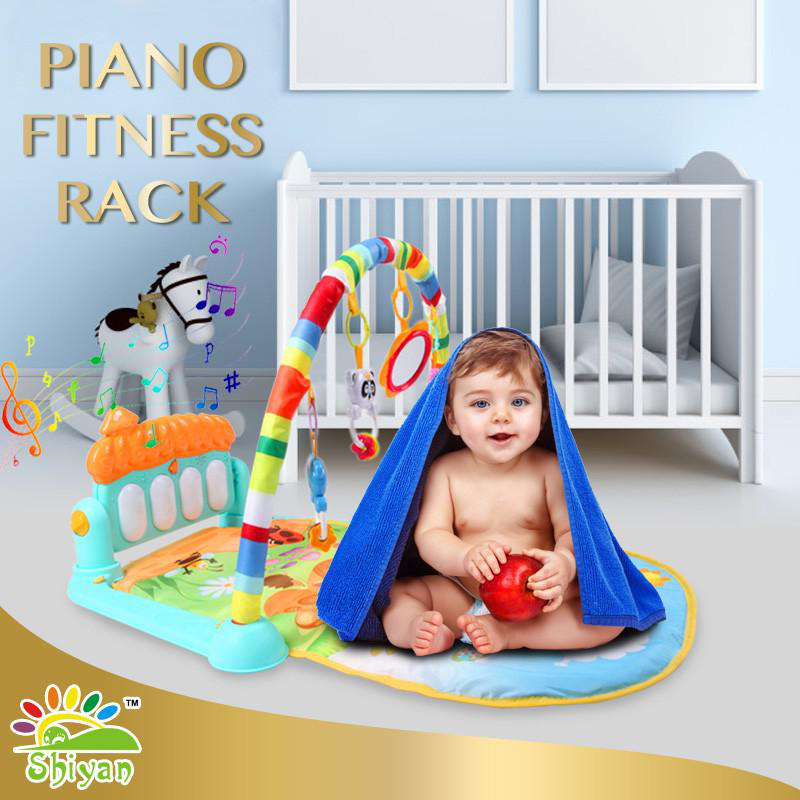

In [28]:
check_1 = list(data_dir.glob('1429052699/*'))
PIL.Image.open(str(check_1[1]))

In [29]:
batch_size = 32
img_height = 128
img_width = 128

In [30]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  # validation_split=0.2,
  # subset="training",
  # seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32412 files belonging to 11014 classes.


In [31]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32412 files belonging to 11014 classes.
Using 6482 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)

['1000051365', '1000106726', '1000644922', '1000673727', '100112565', '1001292672', '1001549466', '1001789326', '1002023044', '1002199397', '1002409299', '1002765200', '100304050', '1003252496', '1003513025', '100467555', '1005010065', '1005412638', '100596628', '1006632886', '1006682573', '1006857895', '1006973111', '10069919', '100773610', '1007825488', '1007887132', '1008524614', '1008700839', '1009103687', '1009426481', '1009607791', '1010342048', '1010522046', '1010747501', '101129666', '1011405834', '1011603387', '1011931446', '1012512895', '1012631413', '1013017519', '1013219548', '1013339050', '1013980683', '1014266988', '1014487628', '1014722657', '1014849774', '1014916122', '1015072454', '1015815580', '1016089803', '1016161298', '1016178132', '1016447215', '101686954', '1017204581', '1017256196', '1017546066', '1017746219', '1018209784', '1018873174', '1018950168', '1019668446', '1019676991', '1019858566', '1020050479', '1020205475', '1020595094', '1022501714', '1024453873', 

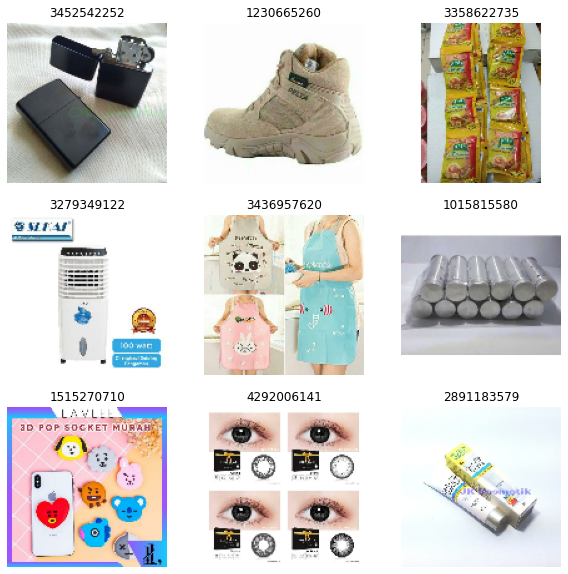

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [35]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [36]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.05686275 1.0


In [37]:
num_classes = 11014

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='tanh'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='softmax'),
  layers.Dense(num_classes)
])

In [38]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [39]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=128
)

Epoch 1/128
1013/1013 [==============================] - 1020s 1s/step - loss: 9.3280 - accuracy: 0.0011 - val_loss: 9.2463 - val_accuracy: 0.0017
Epoch 2/128
1013/1013 [==============================] - 973s 960ms/step - loss: 9.1202 - accuracy: 0.0016 - val_loss: 9.2147 - val_accuracy: 0.0017
Epoch 3/128
1013/1013 [==============================] - 967s 953ms/step - loss: 9.1032 - accuracy: 0.0016 - val_loss: 9.1897 - val_accuracy: 0.0017
Epoch 4/128
1013/1013 [==============================] - 959s 945ms/step - loss: 9.0909 - accuracy: 0.0016 - val_loss: 9.1704 - val_accuracy: 0.0017
Epoch 5/128
1013/1013 [==============================] - 960s 946ms/step - loss: 9.0824 - accuracy: 0.0017 - val_loss: 9.1558 - val_accuracy: 7.7137e-04
Epoch 6/128
1013/1013 [==============================] - 954s 940ms/step - loss: 9.0782 - accuracy: 0.0011 - val_loss: 9.1452 - val_accuracy: 7.7137e-04
Epoch 7/128
1013/1013 [==============================] - 951s 938ms/step - loss: 9.0764 - accuracy: 

1013/1013 [==============================] - 985s 971ms/step - loss: 9.1247 - accuracy: 0.0012 - val_loss: 9.1195 - val_accuracy: 7.7137e-04
Epoch 55/128
1013/1013 [==============================] - 985s 971ms/step - loss: 9.1259 - accuracy: 0.0010 - val_loss: 9.1196 - val_accuracy: 7.7137e-04
Epoch 56/128
1013/1013 [==============================] - 985s 972ms/step - loss: 9.1255 - accuracy: 0.0014 - val_loss: 9.1196 - val_accuracy: 7.7137e-04
Epoch 57/128
1013/1013 [==============================] - 984s 970ms/step - loss: 9.1252 - accuracy: 0.0014 - val_loss: 9.1196 - val_accuracy: 7.7137e-04
Epoch 58/128
1013/1013 [==============================] - 980s 967ms/step - loss: 9.1250 - accuracy: 0.0013 - val_loss: 9.1196 - val_accuracy: 7.7137e-04
Epoch 59/128
1013/1013 [==============================] - 983s 969ms/step - loss: 9.1253 - accuracy: 0.0013 - val_loss: 9.1196 - val_accuracy: 7.7137e-04
Epoch 60/128
1013/1013 [==============================] - 980s 966ms/step - loss: 9.1255 

KeyboardInterrupt: 

In [ ]:
model_2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='tanh'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='softmax'),
  layers.Dense(num_classes)
])

In [ ]:
model_2.compile(
  optimizer='RMSprop',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=128
)